## Least Squares solution for linear regression

The cost function of Least Squares method should be: $ J(\mathbf{w}) = \frac{1}{2N}\Sigma\left\| \mathbf{Xw} - \mathbf{y} \right\|^2 + \lambda \left\| \mathbf{w} \right\|^2$ 

To find the minimum of $J(\mathbf{w})$, we take the derivative with respect to $\mathbf{w}$:  $ \frac{dJ(\mathbf{w})}{d\mathbf{w}} = \frac{1}{N}\mathbf{X}^T(\mathbf{Xw} - \mathbf{y}) + 2\lambda \mathbf{w} $

Setting the derivative to zero gives us a system of linear equations. And we can solve it to get the analytical result as below:

$$ 
\begin{align*}
& \frac{1}{N}\mathbf{X}^T \mathbf{Xw} - \frac{1}{N}\mathbf{X}^T \mathbf{y} + \lambda \mathbf{w} = 0 \\
& (\frac{1}{N}\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})\mathbf{w} = \frac{1}{N}\mathbf{X}^T \mathbf{y} \\
& \mathbf{w} = \frac{1}{N}(\frac{1}{N}\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y} 
\end{align*} 
$$

But typically, we would use the formula below for the code:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \left( \frac{1}{N}(\mathbf{w}_{\text{old}}^T \mathbf{x} - y) \mathbf{x} + 2\lambda \mathbf{w}_{\text{old}} \right)
$$

### Data Preparation

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('boston.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [83]:
legend = list(data.columns)[:-1]
legend_b = legend + ['BIAS']
legend_b

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'BIAS']

In [84]:
print(data.shape, data.isna().values.any(), data.duplicated().values.any())

(506, 14) False False


In [85]:
# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [86]:
X_train = np.array(X_train.values.tolist())
X_test = np.array(X_test.values.tolist())
y_train = np.array(y_train.values.tolist())
y_test = np.array(y_test.values.tolist())

In [87]:
def Z_score(data):
  mean = np.mean(data, axis=0)
  std_dev = np.std(data, axis=0)
  data_normalized = (data - mean) / std_dev
  return data_normalized

def min_max(data):
  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  data_normalized = (data - min_values) / (max_values - min_values)
  return data_normalized

X_train = Z_score(X_train)
X_test = Z_score(X_test)
y_train = Z_score(y_train)
y_test = Z_score(y_test)

### Analytical Solution

In [107]:
lambda_value = 1
N = X_train.shape[0]
I = np.identity(X_train.shape[1])

# Calculate the weights and loss using the analytical method
w = ((1/N) * np.linalg.inv((1/N) * X_train.T @ X_train + lambda_value * I) @ X_train.T @ y_train)
train_loss = (1/(2*N)) * np.sum((X_train @ w - y_train)**2) + lambda_value * np.sum(w**2)
test_loss = (1/(2*N)) * np.sum((X_test @ w - y_test)**2) + lambda_value * np.sum(w**2)

In [108]:
train_loss, test_loss

(0.06130988746976245, 0.038504515278470236)

### Cross Validation for $\lambda$

In [112]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = min_max(np.array(X.values.tolist()))
y = min_max(np.array(y.values.tolist()))

# Step 3: Setup K-Folds Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Lambda Grid Search
lambda_values = np.arange(0, 1, 0.05)
avg_errors = []

for lambda_value in lambda_values:
    errors = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model using the analytical solution and compute the weights
        w = np.linalg.inv((1/N) * X_train.T @ X_train + lambda_value * I) @ ((1/N) * X_train.T @ y_train)
        
        # Make predictions on the test set
        y_pred = np.dot(X_test, w)
        
        # Compute the error (e.g., mean squared error) on the test set
        error = mean_squared_error(y_test, y_pred)
        errors.append(error)
    
    # Compute the average error for the current lambda value
    avg_error = np.mean(errors)
    avg_errors.append(avg_error)

# Step 5: Select the Best Lambda
best_lambda = lambda_values[np.argmin(avg_errors)]

# Step 6: Train Final Model using the best lambda value
final_weights = w = np.linalg.inv((1/N) * X_train.T @ X_train + best_lambda * I) @ ((1/N) * X_train.T @ y_train)

# Print the best lambda value and the final weights
print(f"Best Lambda: {best_lambda}")
print(f"Final Weights: {final_weights}")

Best Lambda: 0.0
Final Weights: [-0.17520852  0.12342339  0.05172653  0.04885606 -0.06969563  0.71991527
  0.06203797 -0.15289843  0.14930765 -0.17302923 -0.10247692  0.19393837
 -0.31109001]


In [113]:
lambda_values

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

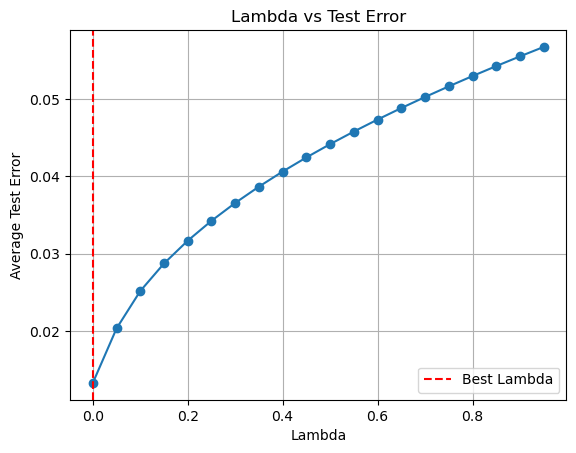

In [115]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(lambda_values, avg_errors, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average Test Error')
plt.title('Lambda vs Test Error')
plt.grid(True)
plt.axvline(x=best_lambda, color='r', linestyle='--', label='Best Lambda')
plt.legend()
plt.savefig("Lambda vs Test Error.jpeg",  dpi=600)

### Iteration Version

In [10]:
def ls_norm(data, label, w, lr, lam, train=True):
  J = 0
  N = data.shape[0]
  gradient = 0
  
  for d, l in zip(data, label):
    pred = w.T @ d
    gradient += (l - pred) * d / N
    J += np.power((l - pred), 2) / (2*N)
  
  J += lam * (w.T @ w)
  print('Error: ', J)
  if train:
    w += lr * (gradient + 2*lam*w)
    return w, J
  else:
    return J

In [57]:
weights = np.random.rand(X_train.shape[1])*0.5
# weights = np.full(X_train.shape[1], 0.1)
bias = np.random.rand(1)
learning_rate = 0.01

In [58]:
weights

array([0.00487949, 0.30486246, 0.34153782, 0.33700893, 0.11804268,
       0.26138541, 0.1821698 , 0.08803592, 0.1468598 , 0.36599716,
       0.19366509, 0.4139066 , 0.44825235])

In [59]:
# No bias
epoch = 200
lambda_ = 0.15
dataset_ = zip(X_train, y_train)
weight_history = []
error_history = []

for e in range(epoch):
    print("==== Epoch: {} ====".format(e))
    weights, loss = ls_norm(X_train, y_train, weights, learning_rate, lambda_)
    print("W: ", weights)
    weight_history.append(weights.copy())
    error_history.append(loss)

==== Epoch: 0 ====
Error:  1.6445311819060189
W:  [-0.00388603  0.31185352  0.33038706  0.33652712  0.10701453  0.27150081
  0.17282261  0.09637657  0.13573585  0.35421211  0.18467792  0.41889324
  0.43561544]
==== Epoch: 1 ====
Error:  1.5245332810436125
W:  [-0.01215974  0.31834437  0.31990216  0.33605102  0.09664132  0.28120681
  0.16406006  0.10410918  0.12522997  0.3430821   0.17611066  0.4235175
  0.42357716]
==== Epoch: 2 ====
Error:  1.4177756138933246
W:  [-0.01996968  0.32436445  0.31004466  0.3355798   0.08688477  0.29052547
  0.15584774  0.11126968  0.1153068   0.33256973  0.1679401   0.42780052
  0.41210386]
==== Epoch: 3 ====
Error:  1.3227692599883545
W:  [-0.02734228  0.32994147  0.30077828  0.33511269  0.07770878  0.2994776
  0.14815326  0.1178919   0.10593305  0.32263974  0.16014435  0.43176222
  0.40116386]
==== Epoch: 4 ====
Error:  1.23819259265908
W:  [-0.03430246  0.33510156  0.29206886  0.33464896  0.06907937  0.3080828
  0.14094607  0.12400772  0.09707731  0.31

In [60]:
print("Final train loss is: ", error_history[-1])

Final train loss is:  0.364736617421908


In [61]:
weight_history

[array([-0.00388603,  0.31185352,  0.33038706,  0.33652712,  0.10701453,
         0.27150081,  0.17282261,  0.09637657,  0.13573585,  0.35421211,
         0.18467792,  0.41889324,  0.43561544]),
 array([-0.01215974,  0.31834437,  0.31990216,  0.33605102,  0.09664132,
         0.28120681,  0.16406006,  0.10410918,  0.12522997,  0.3430821 ,
         0.17611066,  0.4235175 ,  0.42357716]),
 array([-0.01996968,  0.32436445,  0.31004466,  0.3355798 ,  0.08688477,
         0.29052547,  0.15584774,  0.11126968,  0.1153068 ,  0.33256973,
         0.1679401 ,  0.42780052,  0.41210386]),
 array([-0.02734228,  0.32994147,  0.30077828,  0.33511269,  0.07770878,
         0.2994776 ,  0.14815326,  0.1178919 ,  0.10593305,  0.32263974,
         0.16014435,  0.43176222,  0.40116386]),
 array([-0.03430246,  0.33510156,  0.29206886,  0.33464896,  0.06907937,
         0.3080828 ,  0.14094607,  0.12400772,  0.09707731,  0.31325888,
         0.15270276,  0.43542141,  0.39072727]),
 array([-0.04087371,  0.3

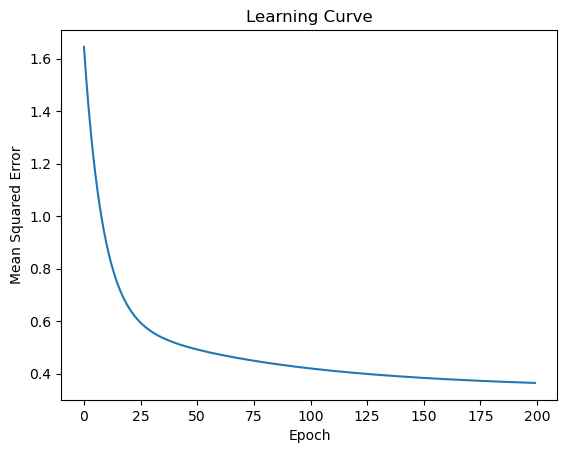

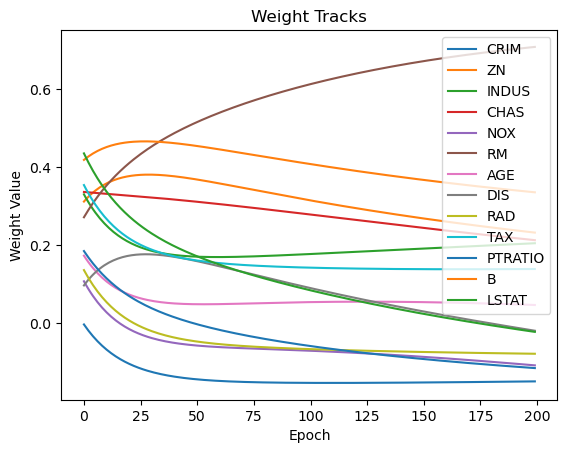

In [62]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(error_history)), error_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

# Plotting the weight tracks
plt.figure()
for i in range(X_train.shape[1]):
    plt.plot([w[i] for w in weight_history], label=legend[i])
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weight Tracks')

plt.legend()
plt.show()